In [3]:
import numpy as np
import matplotlib.pyplot as plt

Let us try to predict the function h(x) or the hypothesis for a linear data first.

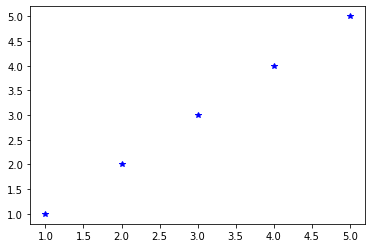

In [6]:
%matplotlib inline
# Magic command for plotting inside the notebook
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.plot(x,y, linestyle = 'None', marker = '*', color = 'blue')

Defining the gradient descent function

In [7]:
def grad_descent(x,y,learning_rate, iterations):
    theta_0 = np.random.randint(low = 2, high = 5);
    theta_1 = np.random.randint(low = 2, high = 5);
    m = x.shape[0]
    
    l_r = learning_rate
    
    ##Magic command to plot graph in the notebook
    %matplotlib notebook
    # Making the graph interactive
    plt.ion()
    
    def mean_error(a,b):
        sum_mean = 0
        for i in range(m):
            sum_mean+= a[i] - b[i]
        return sum_mean/m
        
    def perform_cal(theta_0, theta_1, m):
        h_xi = theta_0 + theta_1 * x
        temp_0 = theta_0 - learning_rate*mean_error(h_xi,y)
        temp_1 = theta_1 - learning_rate*mean_error(h_xi*x,y*x)
        return temp_0, temp_1

    
    its = iterations
    fig = plt.figure()
    ag = fig.add_subplot(111)
    
    for i in range(iterations):
        theta_0,theta_1 = perform_cal(theta_0, theta_1, m)
        ag.clear()
        ag.plot(x,y, linestyle = 'None', marker = 'o')
        ag.plot(x, theta_0+theta_1*x)
        fig.canvas.draw()
        
    
    %matplotlib inline
    
    plt.show()
    
        

<IPython.core.display.Javascript object>


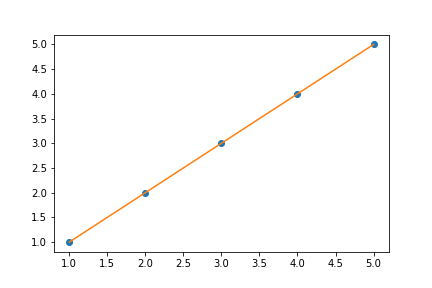

In [8]:
x = np.array(x)
y = np.array(y)

grad_descent(x,y,0.1,500)

# Here we'll see the line moving on it's own w.r.t to 500 iterations

Predicting the model  for y = x*2

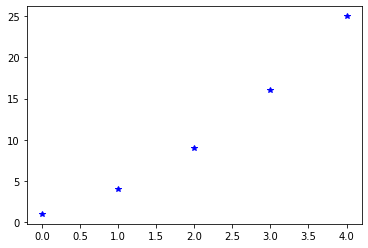

In [9]:
x2 = np.linspace(0,4,5)
y2 = x**2
plt.plot(x2,y2, linestyle = 'None', marker = '*', color = 'b')
plt.show()

<IPython.core.display.Javascript object>


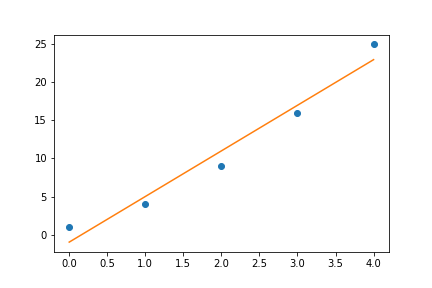

In [10]:
grad_descent(x2,y2,0.05,500)

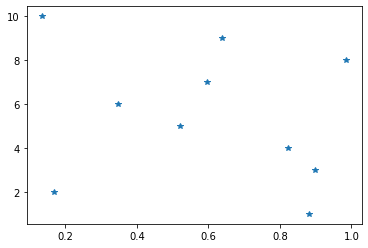

In [11]:
x3 = np.random.random(10)
y3 = np.arange(1,11)
plt.plot(x3,y3, linestyle = 'None', marker = '*')


<IPython.core.display.Javascript object>


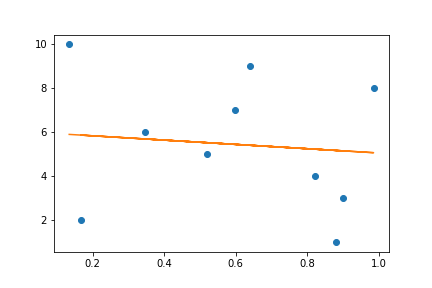

In [12]:
grad_descent(x3,y3,0.05,500)

In [13]:
 
# To test the correction of the function, let us comapare it to a model predicted by a pre-written function in seaborn library.
import seaborn as sns
import pandas as pd
data1 = pd.read_csv('../Advertising.csv')
data1.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


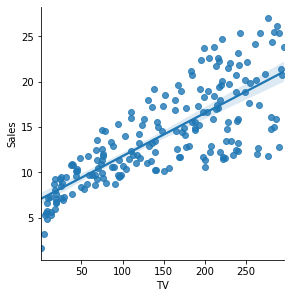

In [21]:
sns.pairplot(data1, x_vars=['TV'], y_vars='Sales', height=4, aspect=1, kind='reg')

So this data basically shows the sales of product depending upon the amount of money spent in advertisement in TV, radio and newspaper.

The y axis represents the million units of products sold. The x-axis represent the amount spend in millions for advertisement.

So above is the model predicted by the seaborn library. Let us run it on our own function.

In [15]:
x4 = data1.TV
y4 = data1.Sales
print(type(x4))
print(type(y4))
print(x4.head(5))
print(y4.head(5))
print(x4.shape)
print(y4.shape)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64
(200,)
(200,)


<IPython.core.display.Javascript object>


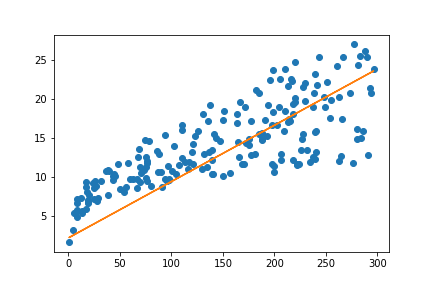

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f2bd5a65940>
Traceback (most recent call last):
  File "/home/prubhtej_s/.local/lib/python3.8/site-packages/matplotlib/transforms.py", line 177, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt: 


In [16]:
x4 = np.array(x4)  #converting pandas Series to numpy array
y4 = np.array(y4)
grad_descent(x4, y4, 0.000068, 2000)

And this worked finally. When I implemented it for the first time I implemented with a very high learning rate which gave me wrong results. Then I lowered the learning rate to get correct results. When you run this in your browser you will see rapidly vibrating lines.

